# 1. Library

In [1]:
!pip install xplotter --upgrade

In [2]:
# Libraries
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

# Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid.inset_locator import InsetPosition

# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines

In [3]:
def single_countplot(df, ax, x=None, y=None, top=None, order=True, hue=False, palette='plasma',
                     width=0.75, sub_width=0.3, sub_size=12):
    ncount = len(df)
    if x:
        col = x
    else:
        col = y

    if top is not None:
        cat_count = df[col].value_counts()
        top_categories = cat_count[:top].index
        df = df[df[col].isin(top_categories)]

    if hue != False:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index, hue=hue)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, hue=hue)
    else:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax)

    format_spines(ax, right_border=False)

    if x:
        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), ha='center', va='bottom')
    else:
        for p in ax.patches:
            x = p.get_bbox().get_points()[1, 0]
            y = p.get_bbox().get_points()[:, 1]
            ax.annotate('{} ({:.1f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va='center')

# 2. Reading and Exploring the Data

In [4]:
df = pd.read_csv('/Users/irischen/Documents/Retail Analytics Project/Sample - Superstore.csv',encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

no missing value

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


numerical value: postal code, sales, quantity, discount, profit

# 3. Exploratory Data Analysis

After making sure the dataset is ready to go, we can go on to do exploratory data analysis and get the insights from the Superstore dataset. The objective here is to perform a deep dive analysis on columns we have to understand the customer behaviour such as order date by week/month, customer's type (which segment do they mainly belong to), which category of the product is the most popular choice, and also the customer's product preference if they are from different background (country/city) etc.

# 3.1 Total Orders of Superstore Over Time

Since our Order Date column is in normal date form, to perform a deep dive analysis on customer's time ordering behaviour, it's advised to break them into small pieces such as year, month, and even the day of week it belongs to for easier data insights to get.

In [7]:
# Changing the data type for date columns
timestamp_cols = ['Order Date']
for col in timestamp_cols:
    df[col] = pd.to_datetime(df[col])
    
# Extracting attributes for Order date - Year and Month
df['order_date_year'] = df['Order Date'].apply(lambda x: x.year)
df['order_date_month'] = df['Order Date'].apply(lambda x: x.month)
df['order_date_month_name'] = df['Order Date'].apply(lambda x: x.strftime('%b'))
df['order_date_year_month'] = df['Order Date'].apply(lambda x: x.strftime('%Y%m'))
df['order_date'] = df['Order Date'].apply(lambda x: x.strftime('%Y%m%d'))

# Extracting attributes for Order date - Day and Day of Week
df['order_date_day'] = df['Order Date'].apply(lambda x: x.day)
df['order_date_dayofweek'] = df['Order Date'].apply(lambda x: x.dayofweek)
df['order_date_dayofweek_name'] = df['Order Date'].apply(lambda x: x.strftime('%a'))

# New Superstore DataFrame after transformations
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Discount,Profit,order_date_year,order_date_month,order_date_month_name,order_date_year_month,order_date,order_date_day,order_date_dayofweek,order_date_dayofweek_name
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,41.9136,2016,11,Nov,201611,20161108,8,1,Tue
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,219.5820,2016,11,Nov,201611,20161108,8,1,Tue
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,0.00,6.8714,2016,6,Jun,201606,20160612,12,6,Sun
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.45,-383.0310,2015,10,Oct,201510,20151011,11,6,Sun
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.20,2.5164,2015,10,Oct,201510,20151011,11,6,Sun


Let's plot three graphs to answer following questions:

1.Was there any growing trend on Superstore's number of orders?\
2.Throughout the week, which day of week customers ordered the most from Superstore?\
3.Which month customers ordered the most from Superstores?

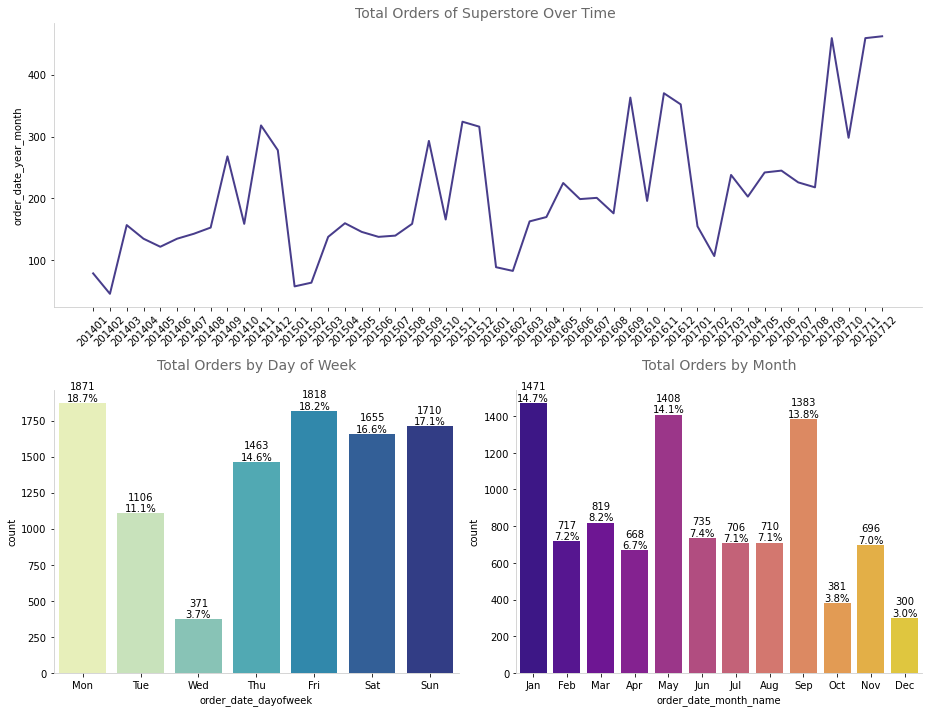

In [8]:
fig = plt.figure(constrained_layout=True, figsize=(13, 10))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Lineplot - Total Orders of Superstore Over Time 
sns.lineplot(data=df['order_date_year_month'].value_counts().sort_index(), ax=ax1, 
             color='darkslateblue', linewidth=2)

format_spines(ax1, right_border=False)
  
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Total Orders of Superstore Over Time ', size=14, color='dimgrey')

# Barchart - Total Orders by Day of Week
single_countplot(df, x='order_date_dayofweek', ax=ax2, order=False, palette='YlGnBu')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)

# Barchart - Total Orders by Month
single_countplot(df, x='order_date_month_name', ax=ax3, order=False)
monthname_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax3.set_xticklabels(monthname_label)
ax3.set_title('Total Orders by Month', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()

From the graphs above, we can observe that:

* Superstore's orders had a growing trend starting from 2014 to 2017, the number of orders were **almost 4 times more in 2017 compared to 2014.**
* In each year, there were **two month spikes** whether customer ordered the most, one was **September**, another one was **November**.
* **Monday** was the day that customers mainly ordered from the Superstore throughout the week.
* **January, May, and September** were three distinct months that customers ordered the most.

# 3.2 Total Orders Comparison Between 2014 and 2017 (Jan to Dec)

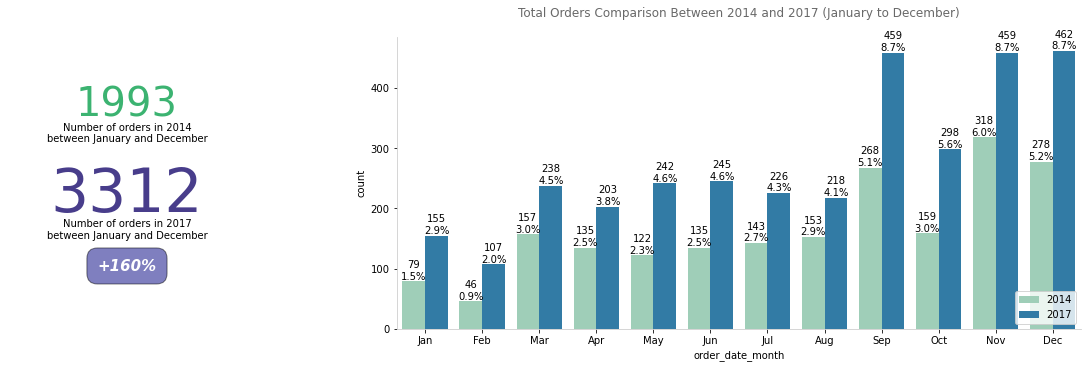

In [12]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(15, 5))

# Axis definition
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# Annotation - Grown on Superstore's orders between 2014 and 2017
df_compare = df.query('order_date_year in (2014, 2017) & order_date_month <=12')
year_orders = df_compare['order_date_year'].value_counts()
growth = int(round(100 * (1 + year_orders[2014] / year_orders[2017]), 0))
ax1.text(0.35, 0.73, f'{year_orders[2014]}', fontsize=40, color='mediumseagreen', ha='center')
ax1.text(0.35, 0.64, 'Number of orders in 2014\nbetween January and December', fontsize=10, ha='center')
ax1.text(0.35, 0.40, f'{year_orders[2017]}', fontsize=60, color='darkslateblue', ha='center')
ax1.text(0.35, 0.31, 'Number of orders in 2017\nbetween January and December', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax1.text(0.35, 0.20, f'{signal}{growth}%', fontsize=15, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax1.axis('off')

# Bar chart - Comparison between monthly sales between 2014 and 2017
single_countplot(df_compare, x='order_date_month', hue='order_date_year', ax=ax2, order=False,
                 palette='YlGnBu')
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.set_xticklabels(month_label)
ax2.set_title('Total Orders Comparison Between 2014 and 2017 (January to December)', size=12, color='dimgrey', pad=20)
plt.legend(loc='lower right')
plt.show()

From the graph above, we can observe that:

* The total orders of 2017 has grown **over 160%** from 2014's 1991 orders to 2017's 3312 orders.
* **September and December** were the months with the **largest growth (3.6% & 3.5%)** compared with other months. It's advised to check which products/customers contributed to this growth in these two months.

# 3.3 Main Segment of Superstore's Customer

In [13]:
def donut_plot(df, col, ax, label_names=None, text='', colors=['crimson', 'navy'], circle_radius=0.8,
            title=f'Gráfico de Rosca', flag_ruido=0):
    values = df[col].value_counts().values
    if label_names is None:
        label_names = df[col].value_counts().index

    if flag_ruido > 0:
        values = values[:-flag_ruido]
        label_names = label_names[:-flag_ruido]

    center_circle = plt.Circle((0, 0), circle_radius, color='white')
    ax.pie(values, labels=label_names, colors=colors, autopct=make_autopct(values))
    ax.add_artist(center_circle)

    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    ax.set_title(title, size=14, color='dimgrey')

Text(0.5, 1.0, 'Customer Type by Segment')

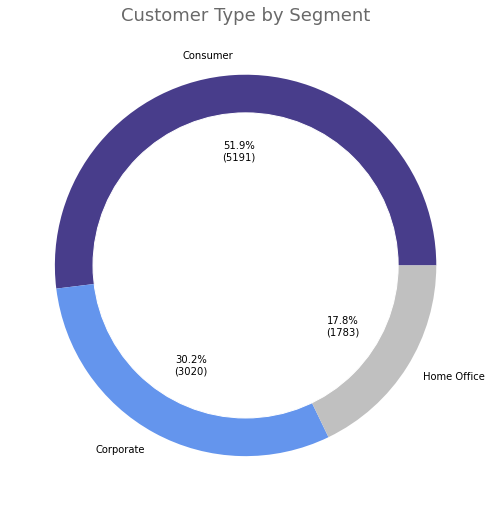

In [15]:
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(20, 9))

# Axis definition with GridSpec
gs = GridSpec(1, 3, figure=fig)
ax = fig.add_subplot(gs[0,0])

# Donut Plot - Customer Type by Segment
colors = ['darkslateblue', 'cornflowerblue', 'silver']
label_names = df['Segment'].value_counts().index
donut_plot(df, col='Segment', ax=ax, label_names=label_names, colors=colors)
ax.set_title(f'Customer Type by Segment', color='dimgrey', size=18)

The main segment of **customers** were Consumer with around **52.0%**, only 30.2% were from Corporate segment and 17.8% were from Home Office segment.

Although Consumer was the main segment in overall picture, it's also worth to check on the Sales and Quantity performance of these segments for Superstore owners to have an clear idea which segment should they target more to earn more sales.

# 3.4 Sales and Quantity Performance by Segment

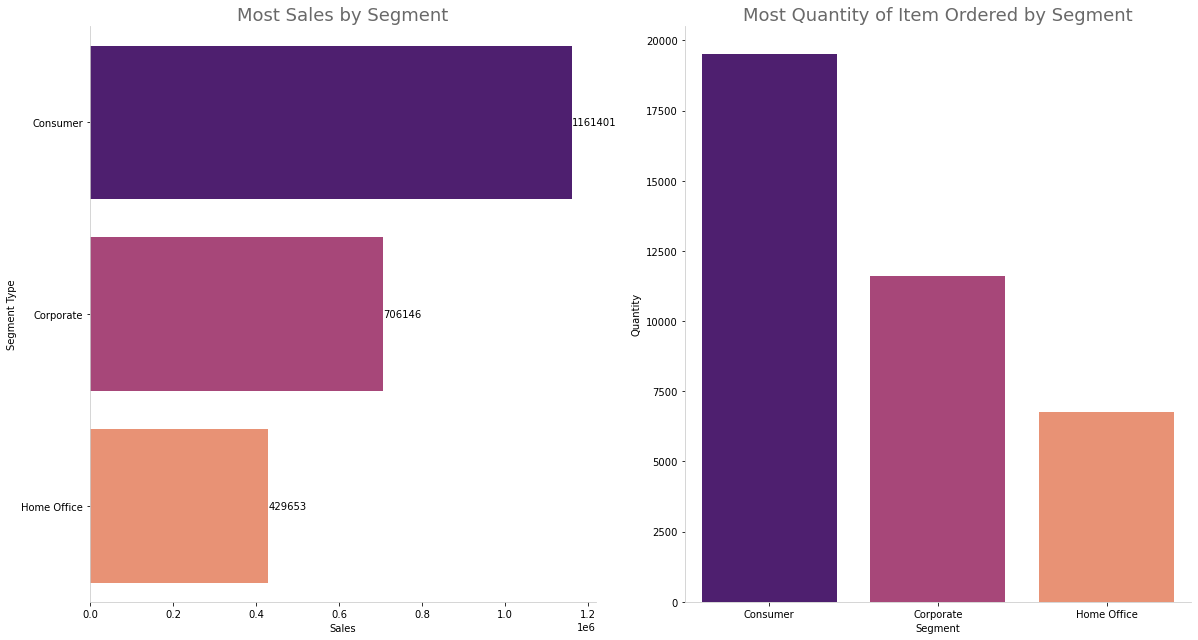

In [16]:
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(25, 9))

# Axis definition with GridSpec
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1:2])

# Grouping data by Segment with Sales
df_segment_sales = df.groupby(by='Segment', as_index=False).sum().loc[:, ['Segment', 'Sales']]
df_segment_sales = df_segment_sales.sort_values(by='Sales', ascending=False).reset_index(drop=True)

# Most Sales by Segment
sns.barplot(y='Segment', x='Sales', data=df_segment_sales, ax=ax1, palette='magma')
AnnotateBars(n_dec=0, font_size=10, color='black').horizontal(ax1)
format_spines(ax1, right_border=False)
ax1.set_title('Most Sales by Segment', size=18, color='dimgrey')
ax1.set_ylabel('Segment Type')

# Grouping data by Segment with Quantity
df_segment_quantity = df.groupby(by='Segment', as_index=False).sum().loc[:, ['Segment', 'Quantity']]

# Most Quantity of Item Ordered by Segment
sns.barplot(y='Quantity', x='Segment', data=df_segment_quantity, ax=ax2, palette='magma')
format_spines(ax2, right_border=False)
ax2.set_title('Most Quantity of Item Ordered by Segment', size=18, color='dimgrey')
ax2.set_ylabel('Quantity')

plt.tight_layout()
plt.show()

From the graphs above, we can conclude that:

* **Consumer segment** represented the **Most Sales** and they ordered the **Most Quantity** of item across all segments. Therefore, Superstore's owners should further target Consumer segment's customers when setting sales and marketing strategy.

# 3.5 Total Orders by Region, City and State

In [18]:
# Grouping data by Region
df_region = df.groupby(by=['order_date_year_month', 'Region'], as_index=False)
df_region = df_region.agg({'Order ID': 'count', 'Sales': 'sum'}).sort_values(by='order_date_year_month')
df_region.columns = ['order_date_year_month', 'Region', 'Order ID', 'Sales']
df_region.reset_index(drop=True, inplace=True)

# Grouping data by City (Top 10)
df_city_group = df.groupby(by='City', as_index=False).count().loc[:, ['City', 'Order ID']]
df_city_group = df_city_group.sort_values(by='Order ID', ascending=False).reset_index(drop=True)
df_city_group = df_city_group.iloc[:10, :]

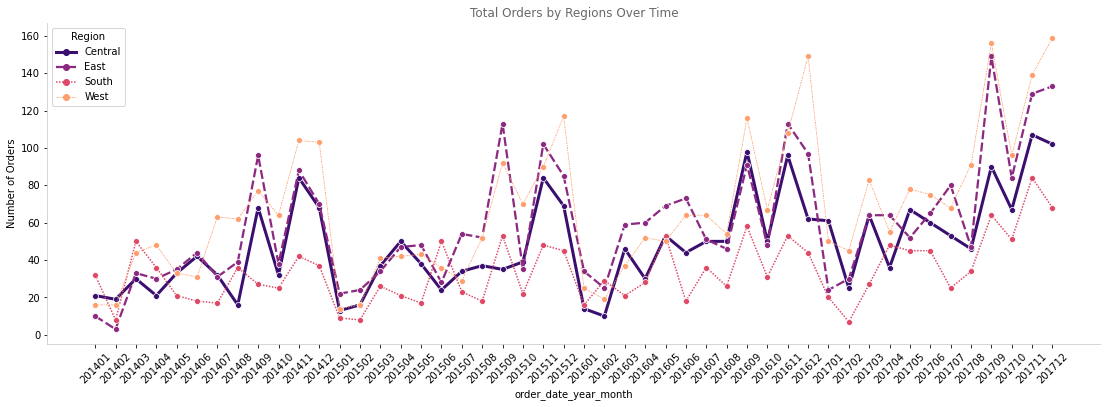

In [19]:
# Creating and preparing figure and axis
fig = plt.figure(constrained_layout=True, figsize=(30, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])

# Total Orders by Regions Over Time
sns.lineplot(x='order_date_year_month', y='Order ID', ax=ax1, data=df_region, hue='Region', 
             size='Region', style='Region', palette='magma', markers=['o'] * 4)
format_spines(ax1, right_border=False)
ax1.set_title('Total Orders by Regions Over Time', size=12, color='dimgrey')
ax1.set_ylabel('Number of Orders')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

From the graph above, we can observe that:

* **West region** represented the **Most Orders** over time from 2014 to 2017. 

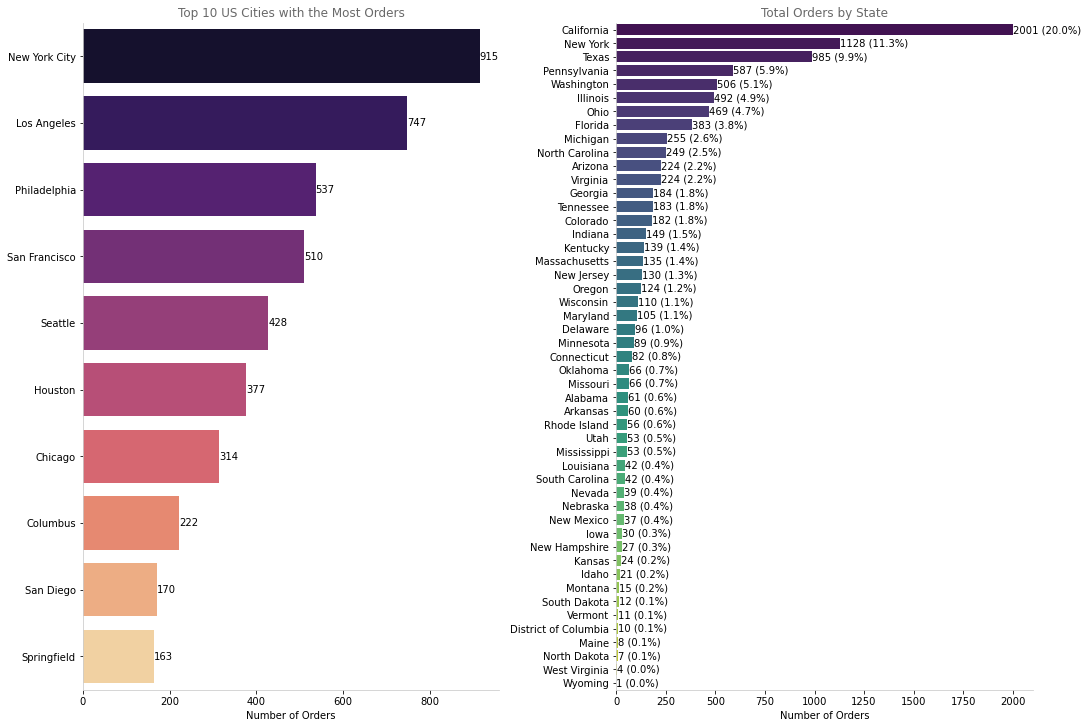

In [20]:
# Creating and preparing figure and axis
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(1, 2, figure=fig)
ax2 = fig.add_subplot(gs[0, 0])
ax3 = fig.add_subplot(gs[0,1:2])

# Top 10 US Cities with the Most Orders
sns.barplot(y='City', x='Order ID', data=df_city_group, ax=ax2, palette='magma')
AnnotateBars(n_dec=0, font_size=10, color='black').horizontal(ax2)
format_spines(ax2, right_border=False)
ax2.set_title('Top 10 US Cities with the Most Orders', size=12, color='dimgrey')
ax2.set_ylabel('')
ax2.set_xlabel('Number of Orders')

# Total orders by state
single_countplot(y='State', ax=ax3, df=df, palette='viridis')
ax3.set_title('Total Orders by State', size=12, color='dimgrey')
ax3.set_ylabel('')
ax3.set_xlabel('Number of Orders')

plt.show()

From the graphs above, we can observe that:

* The Top 3 Cities of Most Orders were: **New York City, Los Angeles, and Philadelphia**.
* The Top 3 States of Mos Orders were: **California, New York, and Texas**.

# 3.6 Main Category of Product Ordered

Text(0.5, 1.0, 'Category of Product Ordered')

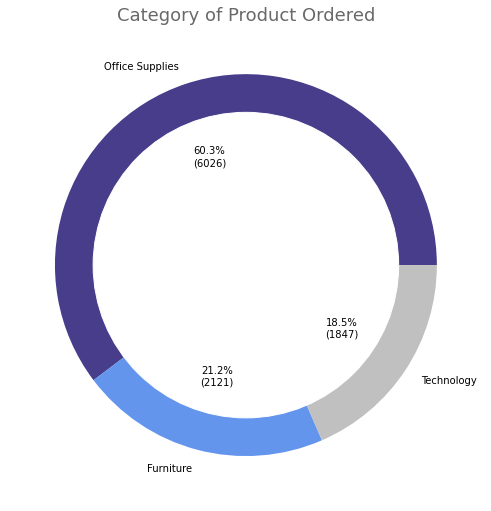

In [21]:
# Building a figure
fig = plt.figure(constrained_layout=True, figsize=(20, 9))

# Axis definition with GridSpec
gs = GridSpec(1, 3, figure=fig)
ax = fig.add_subplot(gs[0,0])

# Donut Plot - Customer Type by Segment
colors = ['darkslateblue', 'cornflowerblue', 'silver']
label_names = df['Category'].value_counts().index
donut_plot(df, col='Category', ax=ax, label_names=label_names, colors=colors)
ax.set_title(f'Category of Product Ordered', color='dimgrey', size=18)

The main category of product ordered were **Office Supplies** with around **60.3%**, only 21.2% were Furniture and 18.5% were Technology.

# 3.7 Top 10 Products Ordered in Superstores

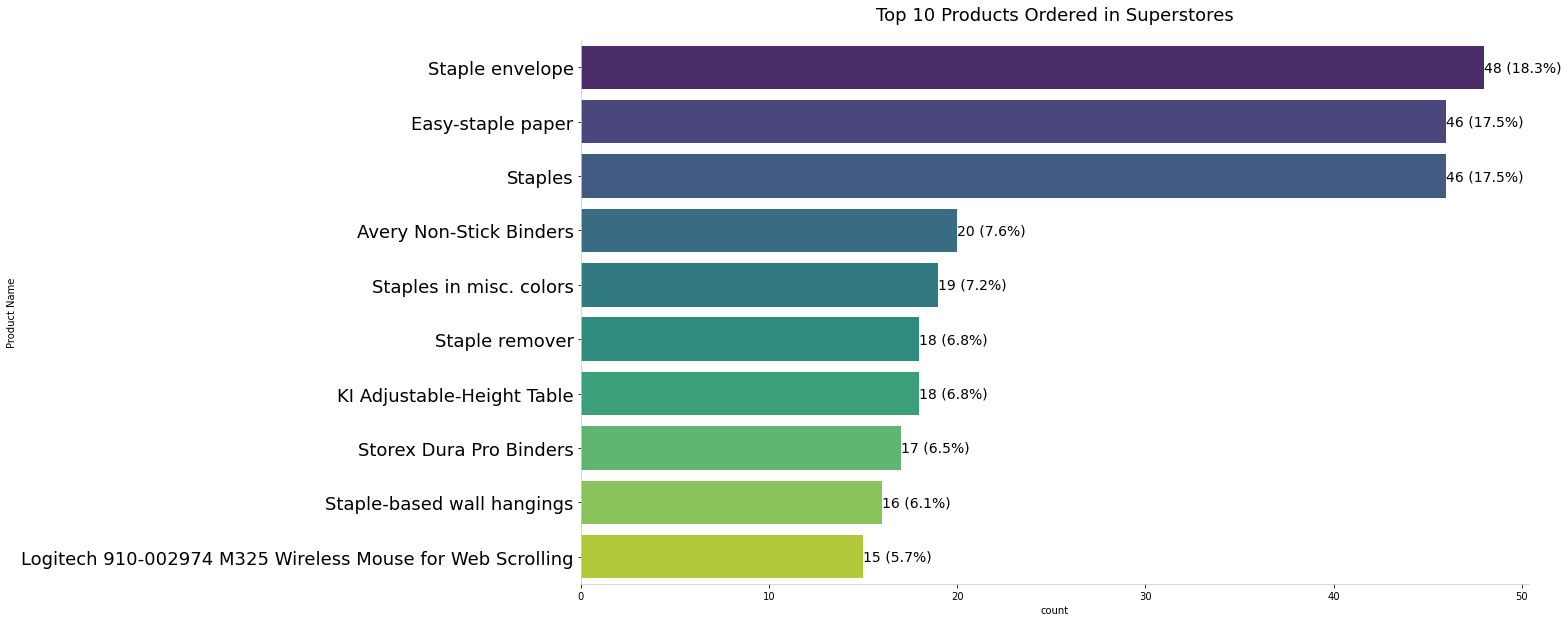

In [23]:
# Top 10 Products Ordered in Superstores
plot_countplot(df, col='Product Name', top=10, orient='h', order=True, figsize=(17, 10), palette='viridis',
               title='Top 10 Products Ordered in Superstores', size_title=18)
plt.yticks(fontsize=(18))
plt.show()

From the graphs above, we can observe that:

* The Top 3 Products were: **Staple envelope, Easy-staple paper, and Staples**.
* Out of the Top 10 Products, it seems that most customers liked to order **Staples related products** from Superstores.

# 4. Conclusion of the EDA

To conclude, if you are the Superstores owner who is planning to grow the store sales and get a better understanding on the customer behaviour to set up your own sales and marketing strategy, I suggest you should target **Consumer segment customer** as they represented the most sales & quantity of items ordered across all segments. According to the EDA, you should be focusing on selling **Staples related products** as most customers ordered these from Superstores. Regarding the marketing and promotion time period, I suggest you should only spend money on ads in **January, May and September** as we observed these months were the Months with Most Orders. If you want the exact Day of Week, then you should **put ads on Monday** as we observed Monday had the most orders, this will be more effective because your marketing promotion message shows at the perfect time to attract your new customers. From a geographical point of view, you should target more on **US West Region**, for Cities, put more ads in **New York City, Los Angeles, and Philadelphia** while for States, put more marketing promotion in **California, New York, and Texas**.